Q1) From HW4Q2, use numpy and matplotlib.pyplot to reproduce the following charts. The charts are for data after cleaning and conversion of variables (to Kilogram and Centimeters). 

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import gzip
import re

pfile = input("Enter the path to the file: ")
#infile = gzip.open("CDBRFS08.ASC.gz", 'rt')
infile = gzip.open(pfile, 'rt')

age = []; cw = []; waya = []; ht = []; gender = []; data = []

for line in infile:
    age += [line[100:102]]
    cw += [line[118:122]]
    ht += [line[122:126]]
    waya += [line[126:130]]
    gender += [line[142]]

data = list(zip(age, cw, waya, ht, gender)) #put alltogether

npdata = np.array(data)         #create a Numpy array

compiled_pattern = re.compile('[ \t]+')
age_list = []
cw_list = []
waya_list = []
height_list = []

for j in range(len(npdata)):
    if (npdata[j,0] == '07') or (npdata[j,0] == '09'):
        age_list.append(int(j))
npdata = np.delete(npdata,age_list,axis=0)

for j in range(len(npdata)):
    if (npdata[j,1] == '7777') or (npdata[j,1] == '9999') or re.search(compiled_pattern, npdata[j,1]) or (0<int(npdata[j,1])<50) or (1000<int(npdata[j,1])<9000) or int(npdata[j,1])>9999:
        cw_list.append(int(j))
npdata = np.delete(npdata,cw_list,axis=0)

for j in range(len(npdata)):
    if (npdata[j,2] == '7777') or (npdata[j,2] == '9999') or re.search(compiled_pattern, npdata[j,2]) or (0<int(npdata[j,2])<50) or (1000<int(npdata[j,2])<9000) or int(npdata[j,2])>9999:
        waya_list.append(int(j))
npdata = np.delete(npdata,waya_list,axis=0)

for j in range(len(npdata)):
    if (npdata[j,3] == '7777') or (npdata[j,3] == '9999') or re.search(compiled_pattern, npdata[j,3]) or (0<int(npdata[j,3])<200) or (711<int(npdata[j,3])<9000):
        height_list.append(int(j))
npdata = np.delete(npdata,height_list,axis=0)

npdata = npdata.astype(np.float64)
# converting pound to kg for weight and WAYA:
for i in range(len(npdata)):
    if npdata[i,1] <9000:
        npdata[i,1] = np.round(npdata[i,1]/2.2,1)
    else:
        npdata[i,1] -= 9000
for i in range(len(npdata)):
    if npdata[i,2] < 9000:
        npdata[i,2] = np.round(npdata[i,2]/2.2,1)
    else:
        npdata[i,2] -= 9000       
        
# converting height to cm (feet*30.48 + inches*2.54):    0-/-- = feet/inch
for i in range(len(npdata)):
    if 200<= npdata[i,3] <=711 :
        num = str(npdata[i,3])
        npdata[i,3] = np.trunc((int(num[0])*30.48 + int(num[1:3])*2.54)+0.5)
    else:
        npdata[i,3] -= 9000


a) (10 points/5 points) Pie chart for the number of males and females participating in the study. Colors used are hotpink and royalblue. Use parameter labeldistance=0.3 to move the label inside. 

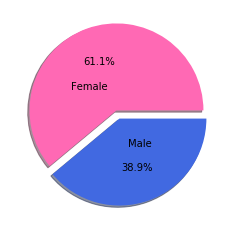

In [287]:
male = len(npdata[npdata[...,4]==1][...,4])
female = len(npdata[npdata[...,4]==2][...,4])
gender = [ female, male]
labels= ['Female', 'Male']
colors = ['hotpink', 'royalblue']
plt.pie(gender, colors=colors ,labels=labels ,autopct='%.1lf%%', explode=[0.1, 0], shadow=True, labeldistance=0.3)
plt.show()

b) (10 points/5 points) Histograms for age distribution

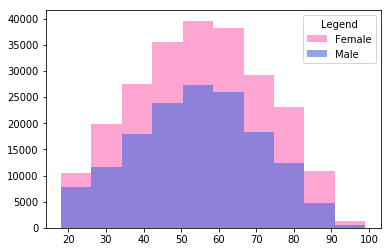

In [306]:
M = npdata[npdata[...,4]==1][...,0]
F = npdata[npdata[...,4]==2][...,0]
colors = [ 'royalblue', 'hotpink']
plt.hist([M,F],histtype='stepfilled',color=colors, alpha=0.6)
plt.legend(title='Legend', labels=['Female','Male'])
plt.show()

c) (10 points/ 5 points) Box plots for CW and WAYA

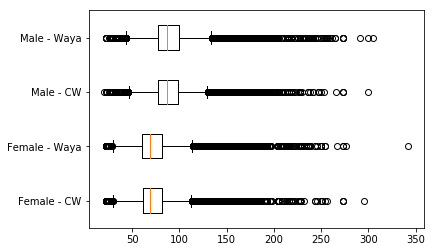

In [289]:
Male_CW = npdata[npdata[...,4]==1][...,1]
Female_CW = npdata[npdata[...,4]==2][...,1]
Male_WAYA = npdata[npdata[...,4]==1][...,2]
Female_WAYA = npdata[npdata[...,4]==2][...,2]

plt.boxplot([Female_CW, Female_WAYA, Male_CW, Male_WAYA], vert=False)
plt.yticks([4,3,2,1],['Male - Waya','Male - CW', 'Female - Waya', 'Female - CW'])
plt.show()

d) (25 points/ 12.5 points) Bar chart to show the percentage of people who gained, lost, or had unchanged weight from last year to current year

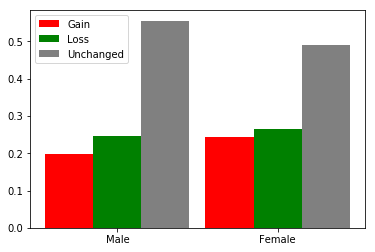

In [290]:
Male_Gained = Male_Lost = Male_Unchanged = 0
Female_Gained = Female_Lost = Female_Unchanged = 0

for cw, waya in zip(Male_CW, Male_WAYA):
    if (cw - waya) > 0:
        Male_Gained = Male_Gained + 1
    elif (cw - waya) < 0:
        Male_Lost = Male_Lost + 1
    else:
        Male_Unchanged = Male_Unchanged + 1

for cw, waya in zip(Female_CW, Female_WAYA):
    if (cw - waya) > 0:
        Female_Gained = Female_Gained + 1
    elif (cw - waya) < 0:
        Female_Lost = Female_Lost + 1
    else:
        Female_Unchanged = Female_Unchanged + 1

x = ['Male', 'Female']
gain = [ Male_Gained/len(M), Female_Gained/len(F) ]       
loss = [ Male_Lost/len(M) , Female_Lost/len(F) ]
unchange = [Male_Unchanged/len(M) ,Female_Unchanged/len(F)]

w = 0.3
ind= np.arange(2)
g = plt.bar(ind-w, height=gain, width=w ,align='center',color= 'r', label='Gain')
l = plt.bar(ind, height=loss, width=w ,align='center',color= 'g', label='Loss')
u = plt.bar(ind+w, height=unchange, width=w ,align='center',color= 'gray', label='Unchanged')

plt.xticks(ind, ('Male', 'Female'))
plt.legend()
plt.show()

e) (45 points/ 22.5 points) A grid consists of height and current weight distributions and the scatter chart. To move yticks to the right, use ax.yaxis.tick_right() and to move the ticks inside the plot, use ax.tick_params(axis="y",direction="in", pad=-25). 

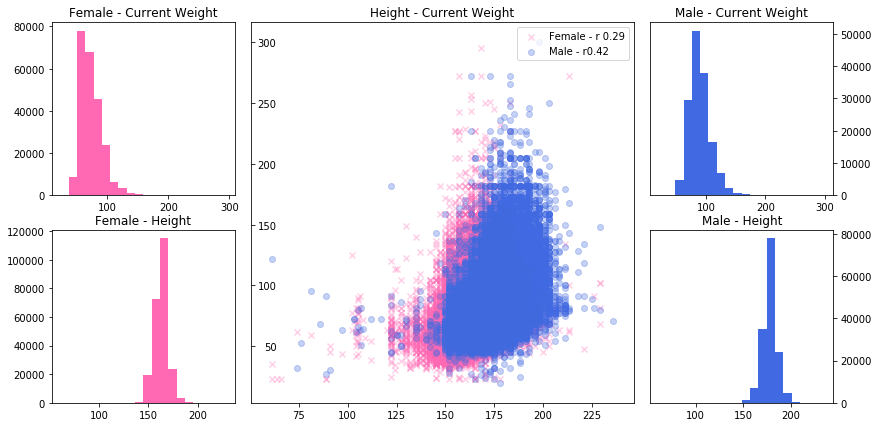

In [300]:
gs = plt.GridSpec(2,8, wspace=0.2, hspace=0.2)

fig = plt.figure(figsize=(14,7))
ax1 = plt.subplot(gs[0,:2])  # top left
ax2 = plt.subplot(gs[0,6:])  # top right
ax3 = plt.subplot(gs[:,2:6])   # mid
ax4 = plt.subplot(gs[1,:2])   # lower left
ax5 = plt.subplot(gs[1,6:])  # lower right

M_cw = npdata[npdata[...,4]==1][...,1]
F_cw = npdata[npdata[...,4]==2][...,1]
M_hei = npdata[npdata[...,4]==1][...,3]
F_hei = npdata[npdata[...,4]==2][...,3]

ax1.hist(F_cw, histtype='stepfilled', color='hotpink', bins=20)
ax1.set_title('Female - Current Weight')
ax4.hist(F_hei, histtype='stepfilled', color='hotpink', bins=20)
ax4.set_title('Female - Height')

ax2.hist(M_cw,histtype='stepfilled',color='royalblue', bins=20)
ax2.set_title('Male - Current Weight')
ax2.yaxis.tick_right()
ax5.hist(M_hei,histtype='stepfilled',color='royalblue', bins=20)
ax5.set_title('Male - Height')
ax5.yaxis.tick_right()

ax3.scatter(F_hei, F_cw,  marker='x', c='hotpink', label='Female',alpha=0.3)
ax3.scatter(M_hei, M_cw, marker='o', c='royalblue', label='Male',alpha=0.3)
ax3.tick_params(axis="y",direction="in", pad=-25)
ax3.set_title('Height - Current Weight')


CC_F = round(np.corrcoef(F_cw, F_hei)[0,1] , 2)
CC_M = round(np.corrcoef(M_cw, M_hei)[0,1] , 2)
ax3.legend(('Female - r ' + str(CC_F), 'Male - r' + str(CC_M)), loc='upper right')

plt.show()

Graduate Students Only: Use the dataset provided (gapminder_lifeExp_gdp) to reproduce the following plots. Use numpy and matplotlib.pyplot. First, remove all entries for Oceania. You may use the following structured data type: dt = {'names':('country', 'year', 'pop', 'continent', 'lifeExp', 'gdp'), 'formats':('U25',np.int16, np.float, 'U10', np.float, np.float)}  